In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder

from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('dataset/battles_cleaned.csv')

In [4]:
np.random.seed(1772023)
le = LabelEncoder()
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: le.fit_transform(x.astype(str)))
df.drop(columns=['year','battle_number','name','attacker_commander','defender_commander'],inplace=True)

In [5]:
y = df['attacker_outcome']
X = df.drop(columns='attacker_outcome')

In [10]:
np.random.seed(1772023)
scaler = StandardScaler()
impute_estimator = DecisionTreeRegressor(max_features='sqrt')
imputer = IterativeImputer(random_state=0, estimator=impute_estimator)
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

classifier = [
    RandomForestClassifier(),
    LogisticRegression(),
    SVC(),
    XGBClassifier(),
    KNeighborsClassifier()
]

scores = pd.DataFrame()
for cf in classifier:
    pipeline = make_pipeline(scaler,imputer,cf)
    scores[cf.__class__.__name__] = cross_val_score(pipeline, X,y, scoring="accuracy", cv=cv, n_jobs=-1)


f1_scores = pd.concat([scores.mean(), scores.std()],
                keys=['Mean', 'STD'], axis=1
                )
f1_scores.sort_values(by='Mean',ascending=False)

,Mean,STD
RandomForestClassifier,0.946429,0.073627
LogisticRegression,0.946429,0.073627
XGBClassifier,0.921429,0.072095
KNeighborsClassifier,0.921429,0.072095
SVC,0.867857,0.009781


## RF Model Confusion Matrix

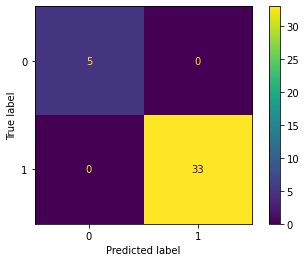

In [7]:
from sklearn.metrics import plot_confusion_matrix
np.random.seed(1772023)
model = make_pipeline(scaler,imputer,RandomForestClassifier())
model.fit(X,y)
plot_confusion_matrix(model, X, y) 

In [8]:
from sklearn.metrics import classification_report
np.random.seed(1772023)
y_preds = model.predict(X)
report = classification_report(y, y_preds)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        33

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## RF Model Feature Importances

In [9]:

importance = model.named_steps['randomforestclassifier'].feature_importances_
np.random.seed(1772023)
df_imp = pd.DataFrame()
df_imp['feature'] = df.drop(columns='attacker_outcome').columns
score = []
for i,v in enumerate(importance):
    score.append(v)
df_imp['score'] = score
df_imp.sort_values(by='score',ascending=False)

,feature,score
7,attacker_size,0.301929
14,attacker_commander_count,0.274569
11,region,0.118162
15,defender_commander_count,0.101967
10,location,0.069289
2,attacker_1,0.030261
8,defender_size,0.027762
4,battle_type,0.013745
0,attacker_king,0.012023
5,major_death,0.011990
